In [1]:
import pandas as pd

In [2]:
file_path = 'Autism-prediction/train.csv'
data = pd.read_csv(file_path)

In [3]:
data_head = data.head()
data_info = data.info()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

(None,
    ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
 0   1         1         0         1         1         1         1         0   
 1   2         0         0         0         0         0         0         0   
 2   3         1         1         1         1         1         1         0   
 3   4         0         0         0         1         0         0         0   
 4   5         0         0         0         0         1         0         0   
 
    A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
 0         1         1  ...       f  White-European       no     no   
 1         0         0  ...       f     South Asian       no     no   
 2         0         1  ...       f  White-European       no     no   
 3         0         0  ...       f     South Asian       no     no   
 4         0         1  ...       m           Black       no    yes   
 
     contry_of_res used_app_before     result     age_desc  relation Class/ASD  
 0

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme(style='whitegrid')

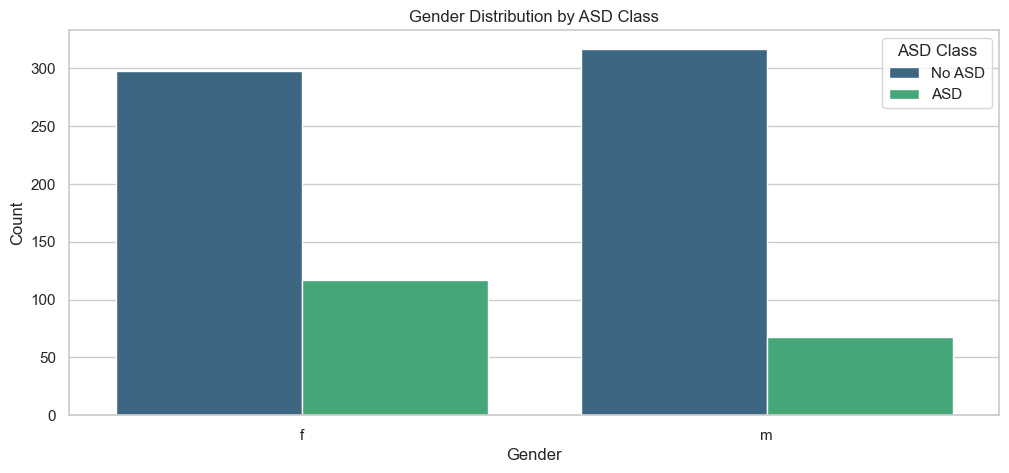

In [6]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="gender", hue="Class/ASD", palette="viridis")
plt.title("Gender Distribution by ASD Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="ASD Class", labels=["No ASD", "ASD"])
plt.show()

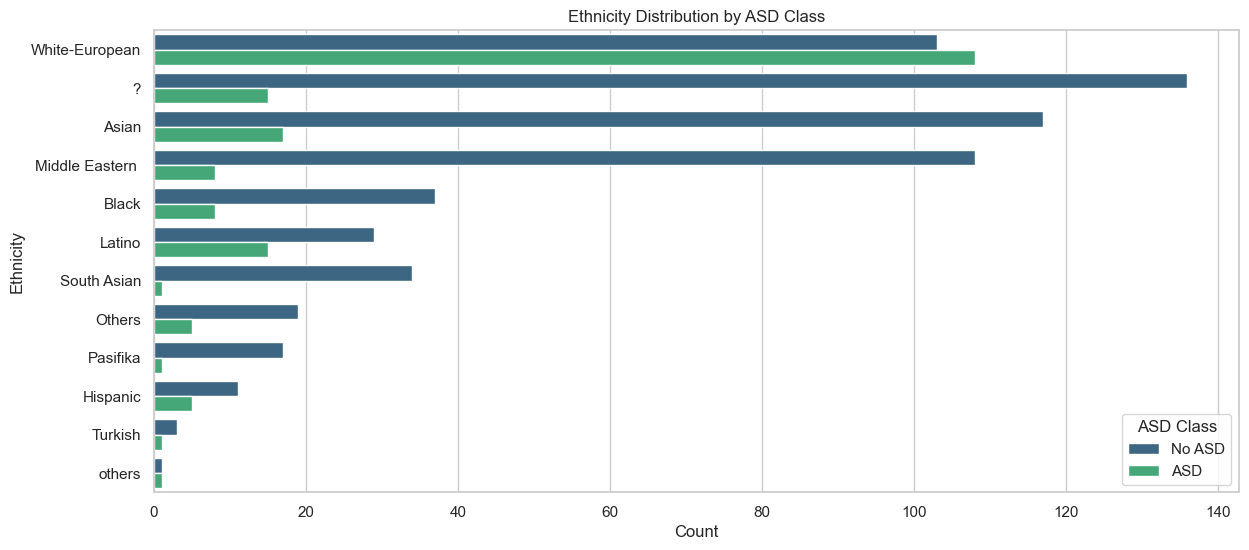

In [7]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, y="ethnicity", hue="Class/ASD", palette="viridis", order=data['ethnicity'].value_counts().index)
plt.title("Ethnicity Distribution by ASD Class")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.legend(title="ASD Class", labels=["No ASD", "ASD"])
plt.show()

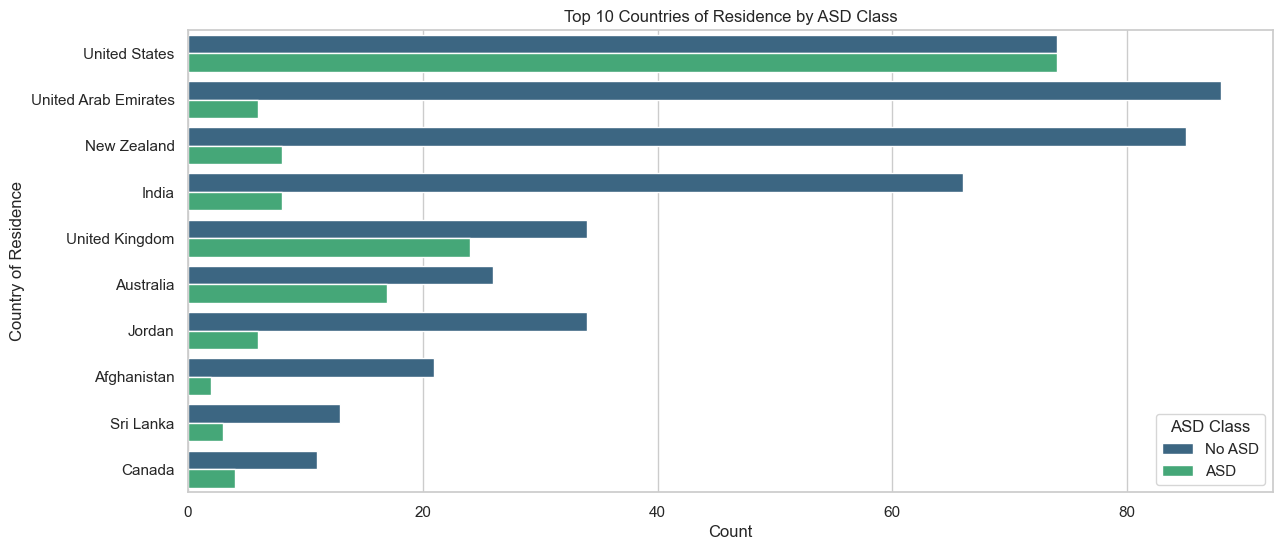

In [8]:
top_countries = data['contry_of_res'].value_counts().head(10).index
filtered_data = data[data['contry_of_res'].isin(top_countries)]
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_data, y="contry_of_res", hue="Class/ASD", palette="viridis", order=top_countries)
plt.title("Top 10 Countries of Residence by ASD Class")
plt.xlabel("Count")
plt.ylabel("Country of Residence")
plt.legend(title="ASD Class", labels=["No ASD", "ASD"])
plt.show()

In [9]:
from scipy.stats import chi2_contingency

In [10]:

# Statistical test for Gender bias
gender_contingency = pd.crosstab(data['gender'], data['Class/ASD'])
gender_chi2, gender_p, _, _ = chi2_contingency(gender_contingency)

# Statistical test for Ethnicity bias
ethnicity_contingency = pd.crosstab(data['ethnicity'], data['Class/ASD'])
ethnicity_chi2, ethnicity_p, _, _ = chi2_contingency(ethnicity_contingency)

# Statistical test for Country bias (limited to top 10 countries)
country_contingency = pd.crosstab(filtered_data['contry_of_res'], filtered_data['Class/ASD'])
country_chi2, country_p, _, _ = chi2_contingency(country_contingency)

{
    "Gender Bias p-value": gender_p,
    "Ethnicity Bias p-value": ethnicity_p,
    "Country Bias p-value": country_p
}


{'Gender Bias p-value': 0.0005696646877719983,
 'Ethnicity Bias p-value': 1.470824325016828e-26,
 'Country Bias p-value': 7.903171314069415e-19}